## 두 집단간 차이 검정

In [1]:
import pandas as pd 

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
apt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 1507 to 12994
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ACC_YEAR        6174 non-null   int64         
 1   SGG_CD          6174 non-null   int64         
 2   SGG_NM          6174 non-null   object        
 3   BJDONG_CD       6174 non-null   int64         
 4   BJDONG_NM       6174 non-null   object        
 5   LAND_GBN        6173 non-null   float64       
 6   LAND_GBN_NM     6173 non-null   object        
 7   BONBEON         6173 non-null   float64       
 8   BUBEON          6173 non-null   float64       
 9   BLDG_NM         6174 non-null   object        
 10  DEAL_YMD        6174 non-null   datetime64[ns]
 11  OBJ_AMT         6174 non-null   int64         
 12  BLDG_AREA       6174 non-null   float64       
 13  TOT_AREA        6174 non-null   float64       
 14  FLOOR           6174 non-null   float64       
 15  

In [2]:
ttest_df = round(apt_df.groupby('month')['OBJ_AMT'].agg(["mean", "std", "size"]), 1)
ttest_df

,mean,std,size
month,,,
3,97682.1,73307.6,3075
4,102817.2,70163.4,3099


In [3]:
import numpy as np
(97613 - 98829) / np.sqrt((((3059-1) * 73359**2 + (2210-1)*68137**2)/(3059+2210-2))*((1/3059) + (1/2210)))

-0.6116187198938243

In [4]:
from pingouin import ttest
import pandas as pd 

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]

march_df = apt_df[apt_df['month'] == 3]
april_df = apt_df[apt_df['month'] == 4]

ttest(march_df['OBJ_AMT'], april_df['OBJ_AMT'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.811424,6155.624136,two-sided,0.004948,"[-8715.76, -1554.51]",0.071573,1.475,0.802755


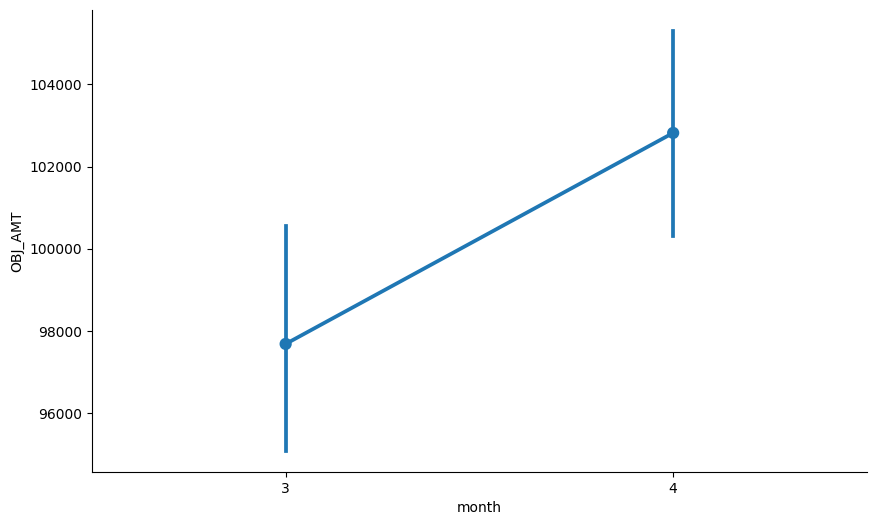

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(x = 'month', y = 'OBJ_AMT', data = apt_df)
sns.despine()

plt.savefig('output/stat01.png', dpi=200)
plt.show()

## 상관분석

In [6]:
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA']].reset_index(drop=True)
corr_df

,DEAL_YMD,OBJ_AMT,BLDG_AREA
0,2023-04-30,72500,59.98
1,2023-04-30,13500,16.69
2,2023-04-30,143000,84.60
3,2023-04-30,79800,59.99
4,2023-04-30,142000,84.61
...,...,...,...
6169,2023-03-01,88000,84.90
6170,2023-03-01,110000,84.90
6171,2023-03-01,125000,59.93
6172,2023-03-01,64000,42.63


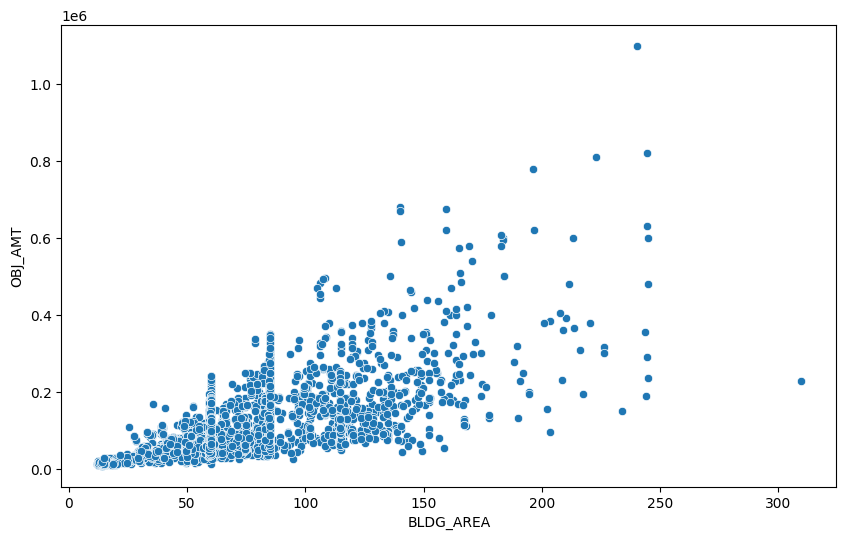

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = corr_df)
plt.savefig('output/stat02.png', dpi=200)
plt.show()

In [8]:
import pingouin as pg
pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,6174,0.651,"[0.64, 0.66]",0.0,inf,1.0


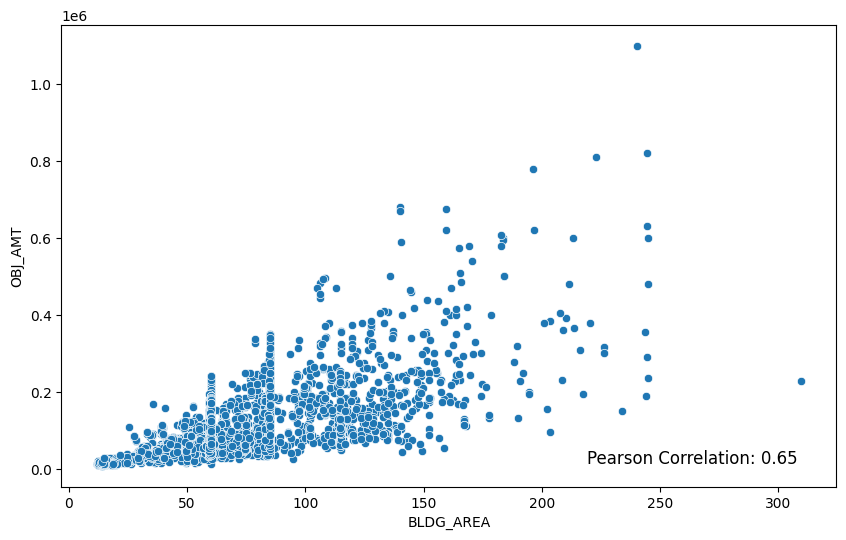

In [9]:
corr_coef = pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)['r'].values[0]

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = corr_df, ax=ax)
ax.text(0.95, 0.05, f'Pearson Correlation: {corr_coef:.2f}',
        transform=ax.transAxes, ha='right', fontsize=12)
plt.savefig('output/stat03.png', dpi=200)
plt.show()

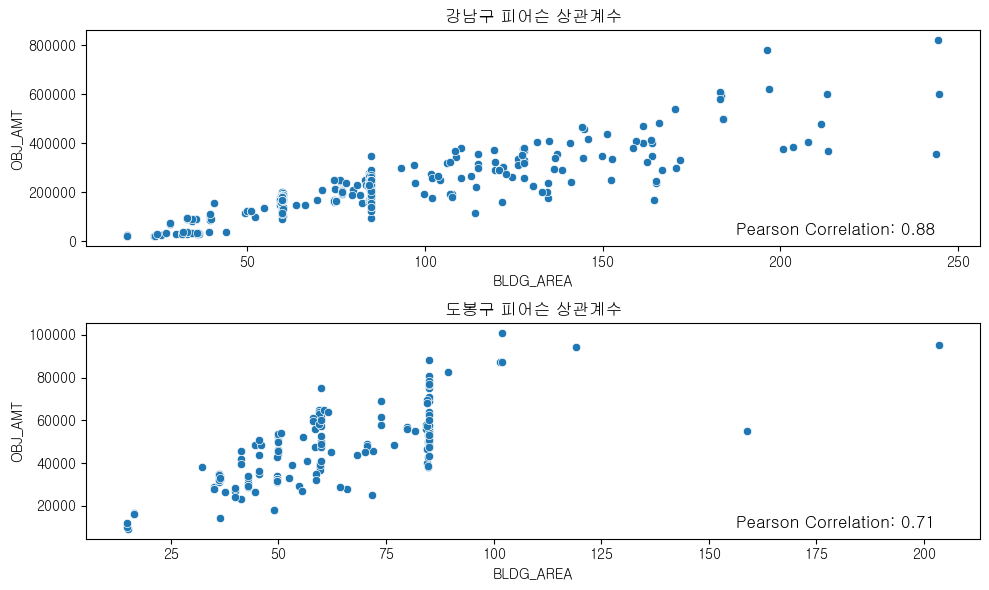

In [10]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sgg_nm = ['강남구', '도봉구']

fig, ax = plt.subplots(figsize=(10, 6), nrows = 2)
for i in range(len(sgg_nm)):
    sgg_df = corr_df[corr_df['SGG_NM'] == sgg_nm[i]]
    corr_coef = pg.corr(sgg_df['BLDG_AREA'], sgg_df['OBJ_AMT']).round(3)['r'].values[0]
    sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = sgg_df, ax=ax[i])
    ax[i].text(0.95, 0.05, f'Pearson Correlation: {corr_coef:.2f}',
            transform=ax[i].transAxes, ha='right', fontsize=12)
    ax[i].set_title(f'{sgg_nm[i]} 피어슨 상관계수')
plt.tight_layout()
plt.savefig('output/stat04.png', dpi=200)
plt.show()

## 일자별 거래건수와 물건금액의 상관관계

In [11]:
mean_size = corr_df.groupby('DEAL_YMD')['OBJ_AMT'].agg(["mean", "size"])
mean_size.head(1)

,mean,size
DEAL_YMD,,
2023-03-01,92634.782609,115


    DEAL_YMD HOUSE_TYPE  OBJ_AMT  BLDG_AREA SGG_NM  month
0 2023-05-18        아파트    51500      59.40   서대문구      5
1 2023-05-18        아파트    41000      39.60    노원구      5
2 2023-05-18        아파트    58000      59.14    강동구      5
3 2023-05-18        아파트    54700      59.96    성동구      5
4 2023-05-18        아파트   207101     208.63    서초구      5
       DEAL_YMD HOUSE_TYPE  OBJ_AMT  BLDG_AREA SGG_NM  month
9760 2023-01-26        아파트   135000      84.74    강동구      1
9761 2023-01-26        아파트   161500      84.60    마포구      1
9762 2023-01-26        아파트   190000     136.33    송파구      1
9763 2023-01-26        아파트    90000      47.70    서초구      1
9764 2023-01-26        아파트   212000      84.96    서초구      1


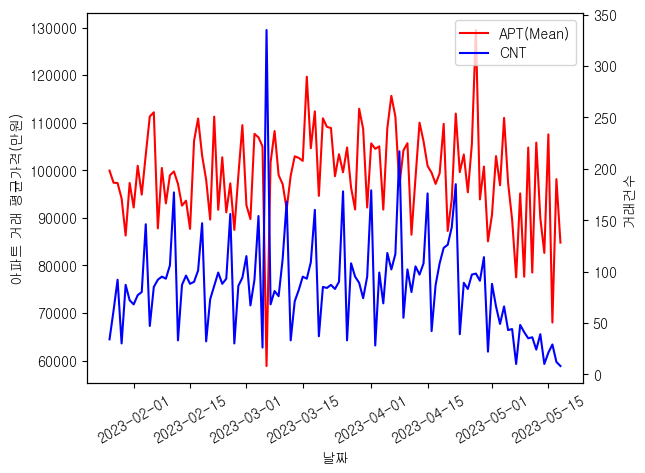

In [22]:
import pandas as pd 

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[seoul['HOUSE_TYPE'] == '아파트']
corr_df = apt_df[['DEAL_YMD', 'HOUSE_TYPE', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)
print(corr_df.head())
print(corr_df.tail())

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

mean_size = corr_df.groupby('DEAL_YMD')['OBJ_AMT'].agg(["mean", "size"])

fig, ax1 = plt.subplots()

ax1.plot(mean_size.index, mean_size['mean'], c="r", label='APT(Mean)')
ax1.set_xlabel('DEAL_DATE')
ax1.set_ylabel('APT(Mean)')

ax2 = ax1.twinx()
ax2.plot(mean_size.index, mean_size['size'], c='b', label="CNT")
ax2.set_ylabel('cnt')

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

plt.legend(handles, labels)
# Rotate x-axis labels
plt.xticks(rotation=45)

ax1.set_xlabel("날짜")
ax1.set_ylabel("아파트 거래 평균가격(만원)")
ax2.set_ylabel("거래건수")
# Rotate x-axis tick labels directly
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
plt.show()

In [26]:
print(len(corr_df[corr_df['month']==5]))
corr_df[corr_df['month']==5]

669


,DEAL_YMD,HOUSE_TYPE,OBJ_AMT,BLDG_AREA,SGG_NM,month
0,2023-05-18,아파트,51500,59.40,서대문구,5
1,2023-05-18,아파트,41000,39.60,노원구,5
2,2023-05-18,아파트,58000,59.14,강동구,5
3,2023-05-18,아파트,54700,59.96,성동구,5
4,2023-05-18,아파트,207101,208.63,서초구,5
...,...,...,...,...,...,...
664,2023-05-01,아파트,110894,84.84,강동구,5
665,2023-05-01,아파트,73000,84.96,관악구,5
666,2023-05-01,아파트,50700,60.00,강북구,5
667,2023-05-01,아파트,138000,53.88,양천구,5


## 회귀분석

6.526222550894483 -0.22336106112990017


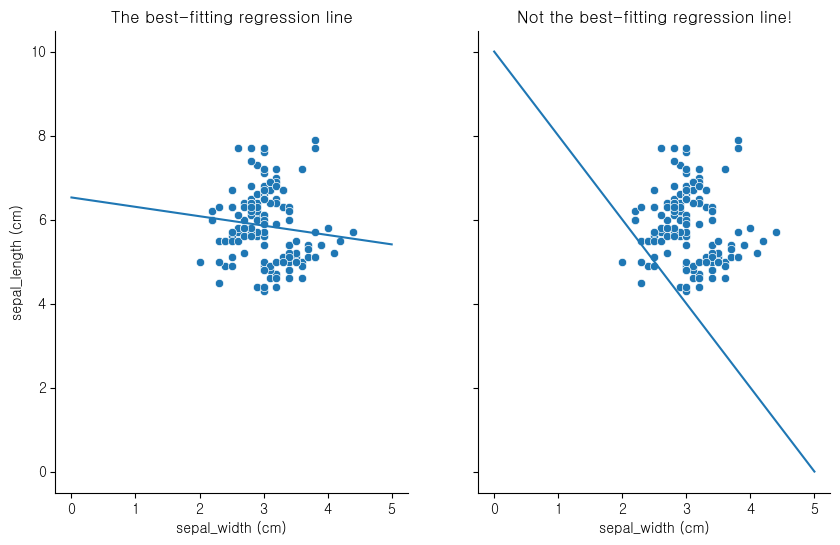

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

iris = sns.load_dataset('iris')

model = smf.ols(formula="sepal_length ~ sepal_width", data=iris).fit()
intercept = model.params.Intercept # 절편
slope = model.params.sepal_width # 기울기

print(intercept, slope)

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
x = np.linspace(0,5)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("sepal_width (cm)")
fig.axes[0].set_ylabel("sepal_length (cm)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("sepal_width (cm)")
fig.axes[1].set_ylabel("sepal_length (cm)")
fig.axes[1].plot(x,-2*x+10)

sns.despine()
plt.savefig('output/stat05.png', dpi=200)
plt.show()

In [14]:
import pingouin as pg

mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [15]:
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'

mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51


In [16]:
iris[['sepal_length', 'sepal_width', 'petal_length']].rcorr()

,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [17]:
mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45


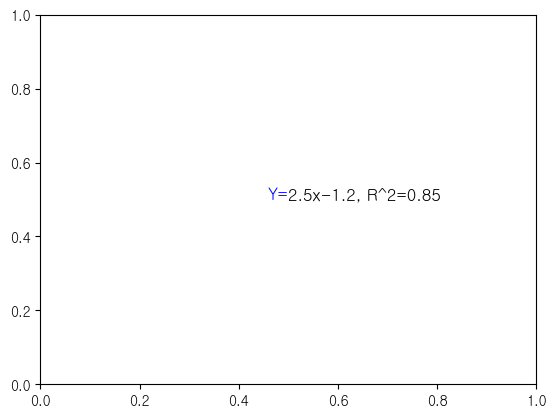

In [18]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Set the x and y coordinates
x = 0.5
y = 0.5

# Define the text
slope = 2.5
intercept = -1.2
adj_r2 = 0.85

if intercept < 0:
    equation_text = f'Y={slope:.1f}x{intercept:.1f}, R^2={adj_r2}'
else:
    equation_text = f'Y={slope:.1f}x+{intercept:.1f}, R^2={adj_r2}'

# Create the Text objects
text_obj_y = plt.text(x, y, 'Y=', fontsize=12, ha='right', color='blue')
text_obj_equation = plt.text(x, y, equation_text[2:], fontsize=12, ha='left')

plt.show()